# Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Load Data

In [2]:
root_path = './data/s1_p1/'
file_name_prefix = 'lat_rel_1p_1s_stamped'
dataSize = ['10b_', '100b_', '1kb_', '10kb_', '100kb_', '250kb_', '1mb_', '4mb_']
transFreq = ['5hz_', '10hz_', '20hz_', '50hz_', '100hz_', '1000hz_']
expNum = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name_suffix = '.csv' 

In [3]:
data_rec = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_late = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_toolate = np.zeros([len(dataSize), len(transFreq), len(expNum)])
data_loss = np.zeros([len(dataSize), len(transFreq), len(expNum)])

In [4]:
for i in range(len(dataSize)):
    for j in range(len(transFreq)):
        for k in range(len(expNum)):
            temp = root_path + file_name_prefix + dataSize[i] + transFreq[j] + expNum[k] + file_name_suffix
            data_rec[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=3, dtype=int)
            data_late[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=4, dtype=int)
            data_toolate[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=5, dtype=int)
            data_loss[i,j,k] = np.loadtxt(temp, skiprows=1, usecols=6, dtype=int)

# Reliability and Late-Rate

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
mean_late = 100 * np.mean(data_late/data_rec, axis=2)
mean_toolate = 100 * np.mean(data_toolate/data_rec, axis=2)
mean_loss = np.mean(data_loss/(data_loss+data_rec), axis=2)

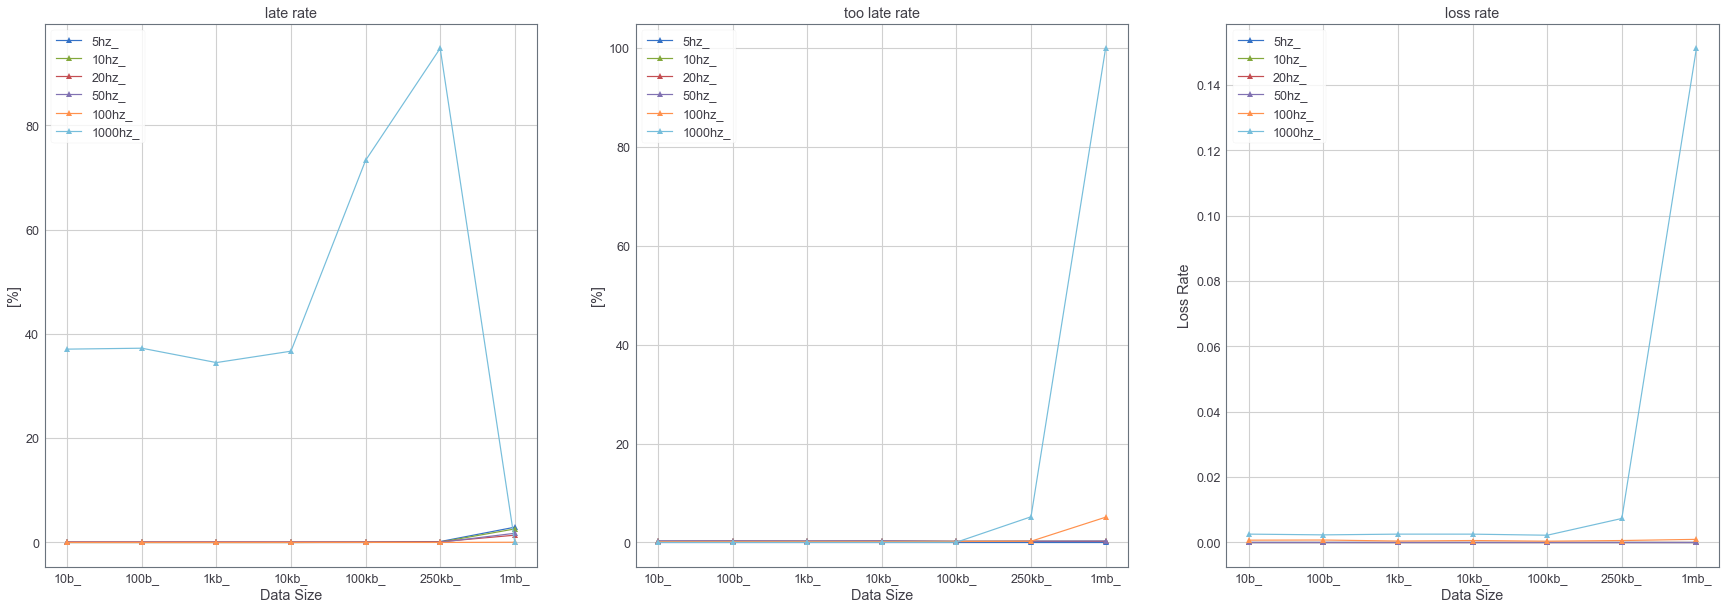

In [7]:
plt.figure(figsize=(30,10))
xs = np.arange(1,len(dataSize), 1)
plt.subplot(131)
for i in range(len(transFreq)):
    plt.plot(xs, mean_late[:-1,i], '-^')
plt.xticks(xs, dataSize[:-1])
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("[%]")
plt.title("late rate")
plt.subplot(132)
for i in range(len(transFreq)):
    plt.plot(xs, mean_toolate[:-1,i], '-^')
plt.xticks(xs, dataSize[:-1])
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("[%]")
plt.title("too late rate")
plt.subplot(133)
for i in range(len(transFreq)):
    plt.plot(xs, mean_loss[:-1,i], '-^')
plt.xticks(xs, dataSize[:-1])
plt.legend(transFreq)
plt.xlabel("Data Size")
plt.ylabel("Loss Rate")
plt.title("loss rate")
plt.savefig("./figures/reliability.pdf", dpi=1600)
plt.show()

# ANOVA Test

In [8]:
late_loss = (data_loss[:-1, :, :]/(data_loss[:-1, :, :]+data_rec[:-1,:,:])).reshape(6*7,10).T.flatten('F')
late_late = 0.3 * (data_late[:-1]/data_rec[:-1]).reshape(6*7,10).T.flatten('F') + 0.7 * (data_toolate[:-1]/data_rec[:-1]).reshape(6*7,10).T.flatten('F')

temp = late_loss
# temp = late_late

anova = pd.DataFrame({
    'late_rate': temp,
    
    'dataSize': np.repeat(dataSize[:-1], 6*10),
    
    'publishFrequency': np.r_[np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10),
                       np.repeat(transFreq, 10)
                 ],     
})

In [9]:
model_summary = rp.summary_cont(anova.groupby(['dataSize', 'publishFrequency']))['late_rate']
model_summary

N    Mean      SD      SE  95% Conf.  Interval
dataSize publishFrequency                                                 
100b_    1000hz_           10  0.0023  0.0010  0.0003     0.0016    0.0031
         100hz_            10  0.0008  0.0007  0.0002     0.0003    0.0012
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
100kb_   1000hz_           10  0.0022  0.0009  0.0003     0.0016    0.0029
         100hz_            10  0.0004  0.0001  0.0000     0.0003    0.0005
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
10b_     1000hz_           10  0.0026  0.0007  0.0002     0.0021    0.0030
         100hz_            10  0.0007  0.0007  0.0002     0.0002    0.0012
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
10kb_    1000hz_           10  0.0026  0.0007  0.0002     0.0021    0.0030
         100hz_            10  0.0006  0.0005  0.0002     0.0002    0.0010
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
1kb_     1000hz_           10  0.0026  0.0007  0.0002     0.0021    0.0030
         100hz_            10  0.0004  0.0000  0.0000        NaN       NaN
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
1mb_     1000hz_           10  0.1513  0.0134  0.0042     0.1417    0.1608
         100hz_            10  0.0010  0.0007  0.0002     0.0004    0.0015
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN
250kb_   1000hz_           10  0.0074  0.0007  0.0002     0.0069    0.0078
         100hz_            10  0.0006  0.0005  0.0002     0.0002    0.0010
         10hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         20hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         50hz_             10  0.0000  0.0000  0.0000        NaN       NaN
         5hz_              10  0.0000  0.0000  0.0000        NaN       NaN

In [10]:
model = ols('late_rate ~ C(dataSize) + C(publishFrequency) + C(dataSize)*C(publishFrequency)'
            , anova).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 41, 378) =  1233.699, p =  0.0000


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              late_rate   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1234.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:21:54   Log-Likelihood:                 2016.5
No. Observations:                 420   AIC:                            -3949.
Df Residuals:                     378   BIC:                            -3779.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.0023      0.001      3.517      0.000       0.001       0.004
C(dataSize)[T.100kb_]                                  -0.0001      0.001     -0.115      0.908      -0.002       0.002
C(dataSize)[T.10b_]                                     0.0002      0.001      0.247      0.805      -0.002       0.002
C(dataSize)[T.10kb_]                                    0.0002      0.001      0.237      0.813      -0.002       0.002
C(dataSize)[T.1kb_]                                     0.0002      0.001      0.242      0.809      -0.002       0.002
C(dataSize)[T.1mb_]                                     0.1489      0.001    158.833      0.000       0.147       0.151
C(dataSize)[T.250kb_]                                   0.0050      0.001      5.357      0.000       0.003       0.007
C(publishFrequency)[T.100hz_]                          -0.0016      0.001     -1.681      0.094      -0.003       0.000
C(publishFrequency)[T.10hz_]                           -0.0023      0.001     -2.487      0.013      -0.004      -0.000
C(publishFrequency)[T.20hz_]                           -0.0023      0.001     -2.487      0.013      -0.004      -0.000
C(publishFrequency)[T.50hz_]                           -0.0023      0.001     -2.487      0.013      -0.004      -0.000
C(publishFrequency)[T.5hz_]                            -0.0023      0.001     -2.487      0.013      -0.004      -0.000
C(dataSize)[T.100kb_]:C(publishFrequency)[T.100hz_]    -0.0002      0.001     -0.187      0.852      -0.003       0.002
C(dataSize)[T.10b_]:C(publishFrequency)[T.100hz_]      -0.0003      0.001     -0.208      0.835      -0.003       0.002
C(dataSize)[T.10kb_]:C(publishFrequency)[T.100hz_]     -0.0004      0.001     -0.285      0.776      -0.003       0.002
C(dataSize)[T.1kb_]:C(publishFrequency)[T.100hz_]      -0.0005      0.001     -0.406      0.685      -0.003       0.002
C(dataSize)[T.1mb_]:C(publishFrequency)[T.100hz_]      -0.1487      0.001   -112.161      0.000      -0.151      -0.146
C(dataSize)[T.250kb_]:C(publishFrequency)[T.100hz_]    -0.0052      0.001     -3.905      0.000      -0.008      -0.003
C(dataSize)[T.100kb_]:C(publishFrequency)[T.10hz_]      0.0001      0.001      0.081      0.935      -0.002       0.003
C(dataSize)[T.10b_]:C(publishFrequency)[T.10hz_]       -0.0002      0.001     -0.174      0.862      -0.003       0.002
C(dataSize)[T.10kb_]:C(publishFrequency)[T.10hz_]      -0.0002      0.001     -0.168      0.867      -0.003       0.002
C(dataSize)[T.1kb_]:C(publishFrequency)[T.10hz_]       -0.0002      0.001     -0.171      0.864      -0.003       0.002
C(dataSize)[T.1mb_]:C(publishFrequency)[T.10hz_]       -0.1489      0.001   -112.31

In [12]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(dataSize),0.031481,6.0,1193.566495,3.496468e-242
C(publishFrequency),0.034409,5.0,1565.488127,4.420606e-250
C(dataSize):C(publishFrequency),0.156463,30.0,1186.426844,0.000000e+00
Residual,0.001662,378.0,NaN,NaN


In [13]:
res.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &    sum\\_sq &     df &            F &         PR(>F) \\\\\n\\midrule\nC(dataSize)                     &  0.031481 &    6.0 &  1193.566495 &  3.496468e-242 \\\\\nC(publishFrequency)             &  0.034409 &    5.0 &  1565.488127 &  4.420606e-250 \\\\\nC(dataSize):C(publishFrequency) &  0.156463 &   30.0 &  1186.426844 &   0.000000e+00 \\\\\nResidual                        &  0.001662 &  378.0 &          NaN &            NaN \\\\\n\\bottomrule\n\\end{tabular}\n'